<a href="https://colab.research.google.com/github/tpaldenb/Dry-Bean-Classification/blob/main/Dry_Bean_Classification_with_10fold_cross_validation%2C_SMOTE_and_Yeo_Johnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# creating DataFrame from the dataset
beans_df = pd.read_csv('Dry_Bean_Dataset.csv')
beans_df.sample(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
6751,56433,948.827,381.693063,191.664022,1.991470,0.864785,57627,268.053590,0.763723,0.979281,0.787715,0.702275,0.006764,0.001015,0.493191,0.982174,HOROZ
2795,71483,1048.599,388.373662,234.915246,1.653250,0.796325,72503,301.686895,0.760684,0.985932,0.816947,0.776795,0.005433,0.001220,0.603411,0.997590,BARBUNYA
3938,60592,919.006,354.260007,218.458278,1.621637,0.787229,61008,277.755523,0.812171,0.993181,0.901547,0.784044,0.005847,0.001363,0.614725,0.996861,CALI
4744,75515,1043.179,403.919394,239.473010,1.686701,0.805296,76287,310.078513,0.706263,0.989880,0.872018,0.767674,0.005349,0.001146,0.589324,0.994013,CALI
11910,32147,671.343,253.992246,161.386828,1.573810,0.772183,32469,202.313696,0.710824,0.990083,0.896316,0.796535,0.007901,0.001962,0.634468,0.998532,DERMASON
12307,33749,675.062,245.527065,175.680166,1.397580,0.698590,34086,207.293419,0.756704,0.990113,0.930644,0.844279,0.007275,0.002280,0.712808,0.996205,DERMASON
5194,83343,1113.526,416.809089,257.689137,1.617488,0.785987,84140,325.753900,0.806532,0.990528,0.844653,0.781542,0.005001,0.001151,0.610808,0.987975,CALI
3749,188557,1648.893,620.436387,390.188219,1.590095,0.777492,190364,489.977784,0.733571,0.990508,0.871500,0.789731,0.003290,0.000789,0.623675,0.991702,BOMBAY
7377,67708,1078.716,435.891648,198.621916,2.194580,0.890150,68617,293.612846,0.578924,0.986753,0.731199,0.673591,0.006438,0.000818,0.453725,0.995736,HOROZ
10598,27036,609.278,226.352300,153.042331,1.479018,0.736787,27358,185.535183,0.688079,0.988230,0.915211,0.819674,0.008372,0.002331,0.671866,0.993702,DERMASON


In [ ]:
# displaying unique class values
beans_df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
# checking datatypes
beans_df.dtypes

,0
Area,int64
Perimeter,float64
MajorAxisLength,float64
MinorAxisLength,float64
AspectRation,float64
Eccentricity,float64
ConvexArea,int64
EquivDiameter,float64
Extent,float64
Solidity,float64


In [ ]:
# 13611 number of entries
beans_df['Class'].count()

np.int64(13611)

In [ ]:
# to drop null values
beans_df.dropna(axis = 0)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
beans_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [ ]:
beans_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
beans_df['Class'].describe()

,Class
count,13611
unique,7
top,DERMASON
freq,3546


In [ ]:
beans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
for col in beans_df.columns:
  print(col + ':', beans_df[col].unique())

Area: [28395 28734 29380 ... 42139 42147 42159]
Perimeter: [610.291 638.018 624.11  ... 759.321 763.779 772.237]
MajorAxisLength: [208.1781167 200.5247957 212.8261299 ... 281.5399279 283.3826364
 295.142741 ]
MinorAxisLength: [173.888747  182.7344194 175.9311426 ... 191.1879789 190.2757308
 182.2047159]
AspectRation: [1.19719142 1.09735646 1.20971266 ... 1.47258175 1.48932623 1.61984139]
Eccentricity: [0.54981219 0.41178525 0.56272732 ... 0.73406478 0.74105479 0.78669302]
ConvexArea: [28715 29172 29690 ... 42494 42667 42600]
EquivDiameter: [190.1410973 191.2727505 193.4109041 ... 231.6312612 231.6532475
 231.6862231]
Extent: [0.76392252 0.78396813 0.77811325 ... 0.72993244 0.70538912 0.7889625 ]
Solidity: [0.988856   0.9849856  0.98955877 ... 0.98989875 0.98781259 0.98964789]
roundness: [0.95802713 0.88703364 0.94784947 ... 0.91842409 0.90790646 0.88838037]
Compactness: [0.91335776 0.95386084 0.90877424 ... 0.8227297  0.81745745 0.78499719]
ShapeFactor1: [0.00733151 0.00697866 0.007243

In [ ]:
for cl in beans_df['Class'].unique():
  print(cl)
  print(beans_df[beans_df['Class'] == cl].describe())
  print()

SEKER
               Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count   2027.000000  2027.000000      2027.000000      2027.000000   
mean   39881.299951   727.672440       251.291957       201.909653   
std     4779.877395    47.849014        19.969504        10.942797   
min    28395.000000   610.291000       200.524796       171.210559   
25%    36408.000000   692.948500       237.037081       193.919169   
50%    39180.000000   721.292000       249.152044       200.432810   
75%    42700.000000   755.011500       262.802106       208.745418   
max    61150.000000   933.372000       339.931533       252.287649   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter       Extent  \
count   2027.000000   2027.000000   2027.000000    2027.000000  2027.000000   
mean       1.245182      0.584781  40269.567341     224.948441     0.771674   
std        0.082223      0.071265   4823.866621      13.294146     0.018828   
min        1.024868      0.218951  28715.000000

In [ ]:
beans_types = beans_df['Class']
beans_types

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [ ]:
beans_types.value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


In [ ]:
species_counts = beans_types.value_counts().values
species_names = beans_types.value_counts().index

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

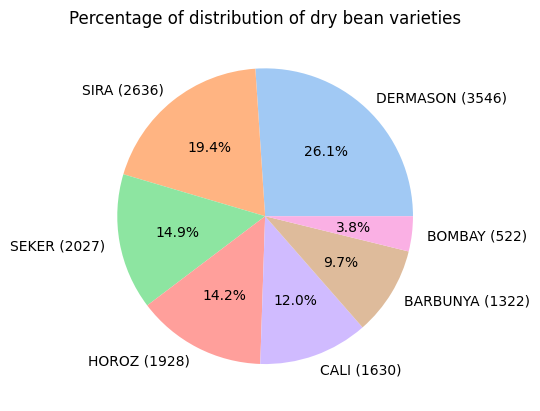

In [ ]:
# PIE CHART REPRESENTATION OF DISTRIBUTION OF CLASSES
plt.pie(species_counts, labels=[f'{name} ({count})' for name, count in zip(species_names, species_counts)], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Percentage of distribution of dry bean varieties')
plt.show()

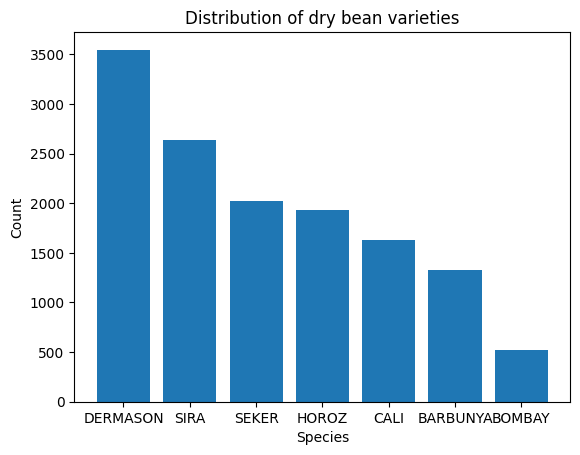

In [ ]:
plt.bar(species_names, species_counts)
plt.title('Distribution of dry bean varieties')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [ ]:
min_count = species_counts.min()
min_count

np.int64(522)

In [ ]:
# balancing dataset by using SMOTE(Synthetic Minority Over-Sampling Technique)
from imblearn.over_sampling import SMOTE

x = beans_df.drop(columns = ['Class'])
Y = beans_df['Class']

smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x, Y)

beans_oversampled = pd.DataFrame(x_balanced, columns = x.columns)
beans_oversampled['Class'] = y_balanced
beans_oversampled

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291000,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018000,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110000,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884000,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134000,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24817,43169,780.614181,290.000273,190.489454,1.522451,0.753955,43855,234.446859,0.747149,0.984367,0.890258,0.808451,0.006718,0.001770,0.653604,0.995010,SIRA
24818,53592,882.208452,341.523450,201.345268,1.696359,0.807658,54108,261.220563,0.759305,0.990457,0.865313,0.764888,0.006373,0.001346,0.585068,0.992363,SIRA
24819,47980,830.677616,323.836822,189.140484,1.712477,0.811491,48475,247.164598,0.797030,0.989792,0.873792,0.763315,0.006749,0.001414,0.582709,0.997481,SIRA
24820,48222,826.538366,309.497879,199.175171,1.554259,0.765076,48789,247.786752,0.724073,0.988380,0.887028,0.800705,0.006418,0.001628,0.641203,0.996126,SIRA


In [ ]:
# dataset is balanced
beans_oversampled['Class'].value_counts()

,count
Class,
SEKER,3546
BARBUNYA,3546
BOMBAY,3546
CALI,3546
HOROZ,3546
SIRA,3546
DERMASON,3546


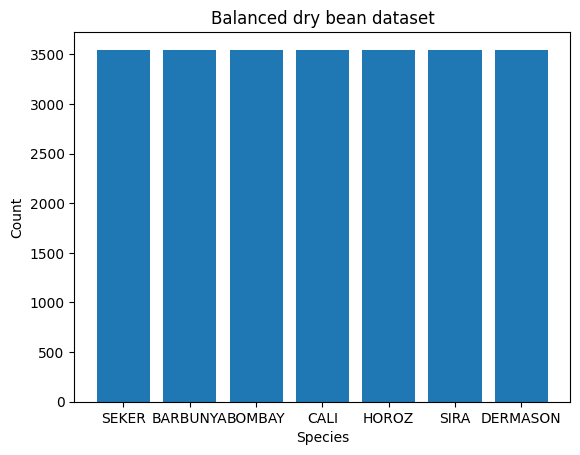

In [ ]:
plt.bar(beans_oversampled['Class'].value_counts().index, beans_oversampled['Class'].value_counts().values)
plt.title('Balanced dry bean dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

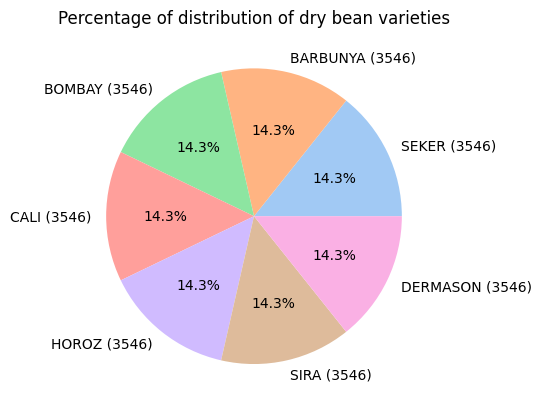

In [ ]:
class_counts = beans_oversampled["Class"].value_counts()
plt.pie(
    class_counts.values,
    labels=[f'{name} ({count})' for name, count in class_counts.items()],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel')
)
plt.title('Percentage of distribution of dry bean varieties')
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
beans_transformed = beans_oversampled.copy()
# Selecting numeric columns except target
numeric_cols = beans_transformed.select_dtypes(include=['float64', 'int64']).columns

# Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
beans_transformed[numeric_cols] = pt.fit_transform(beans_transformed[numeric_cols])

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


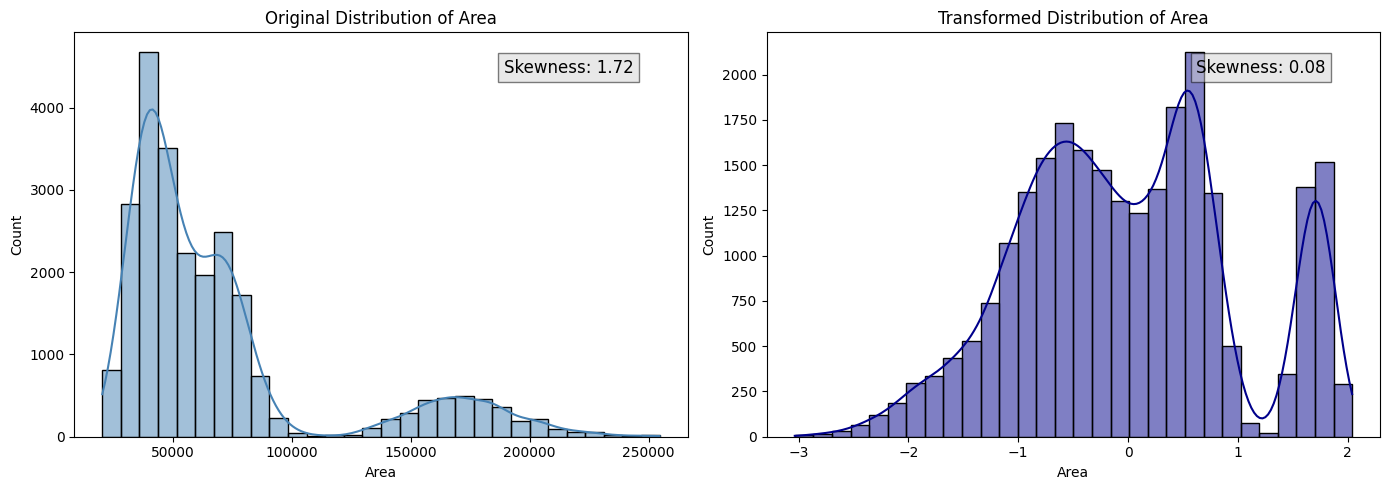

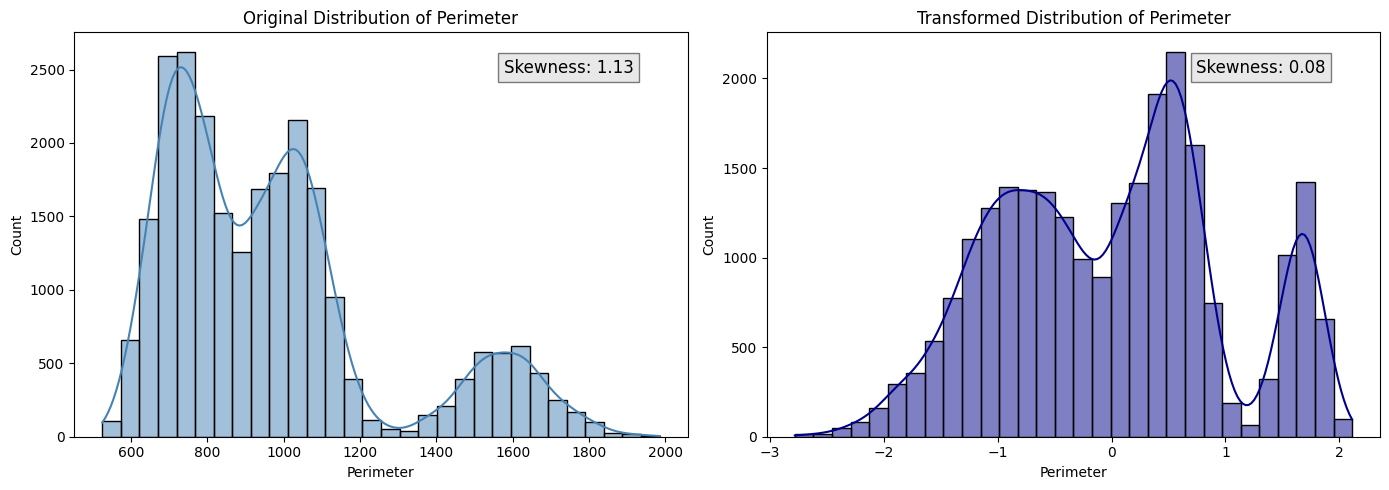

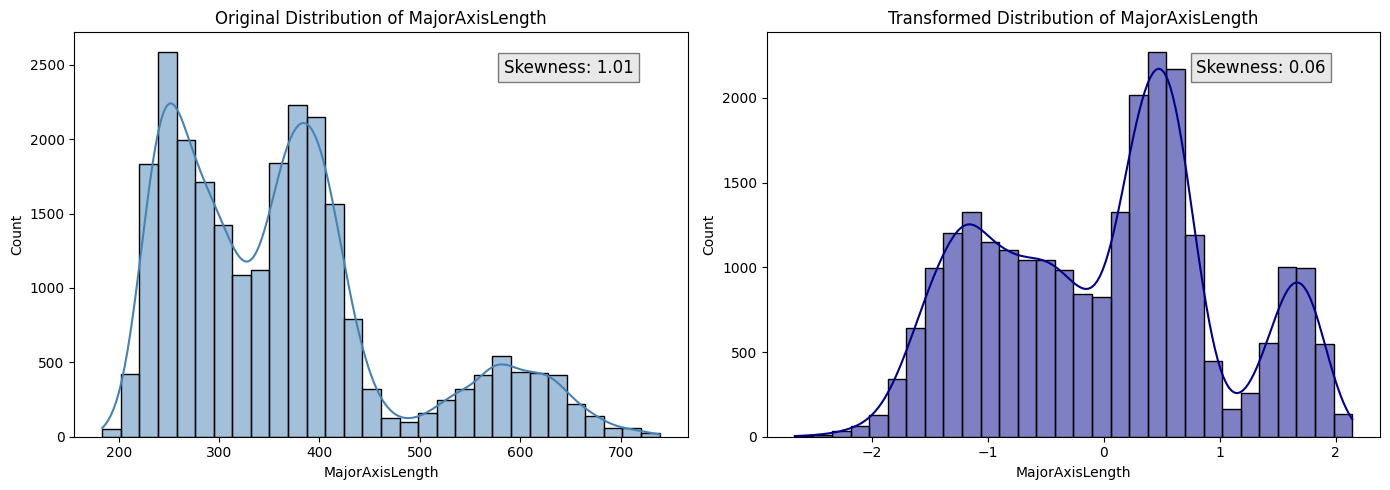

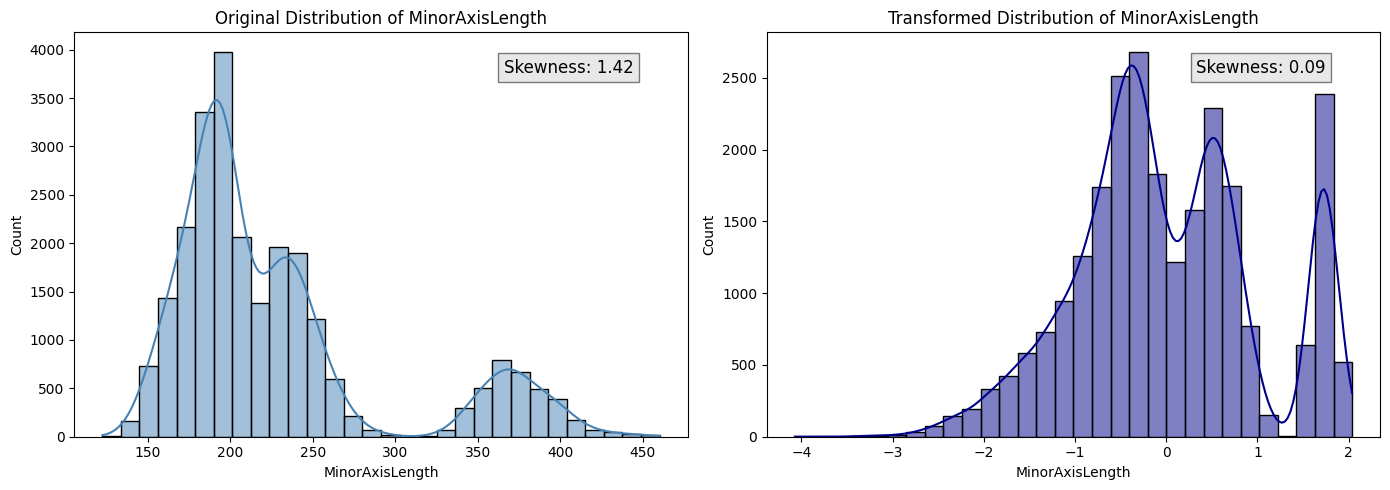

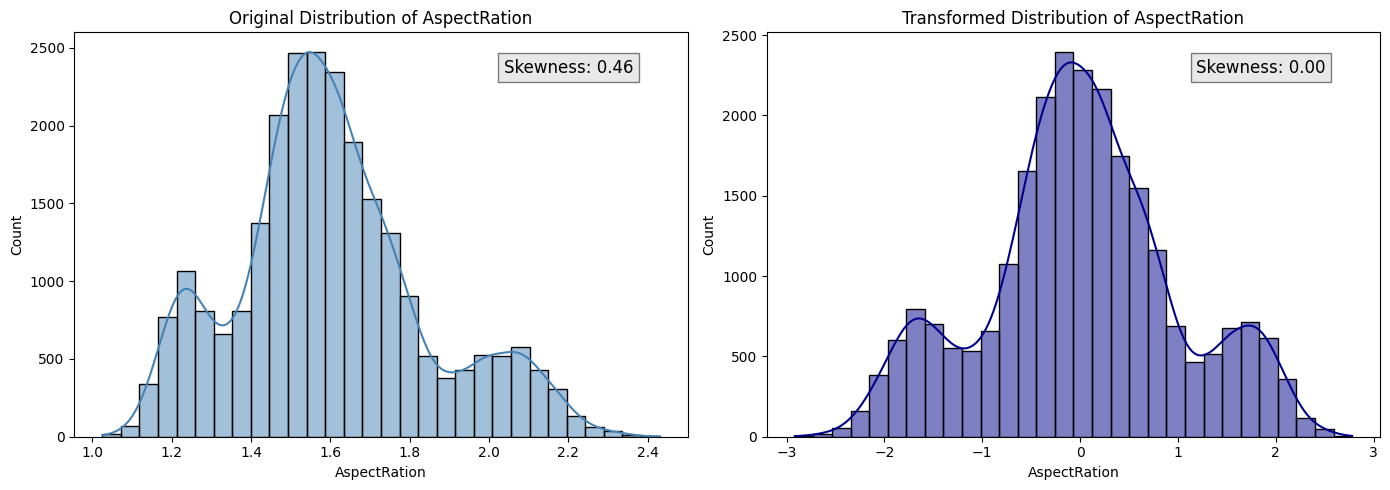

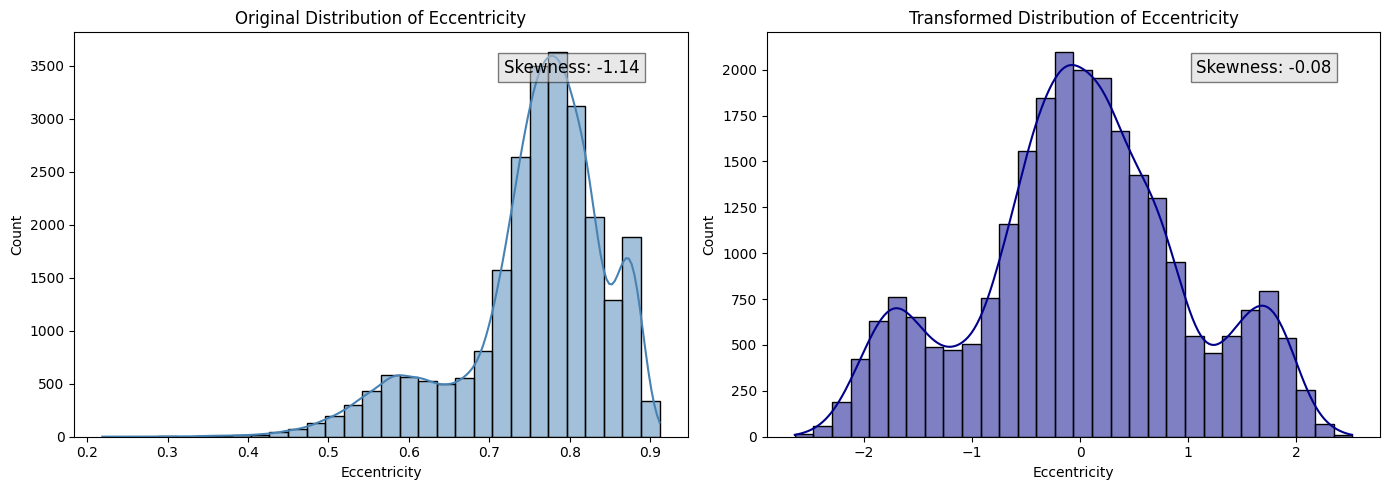

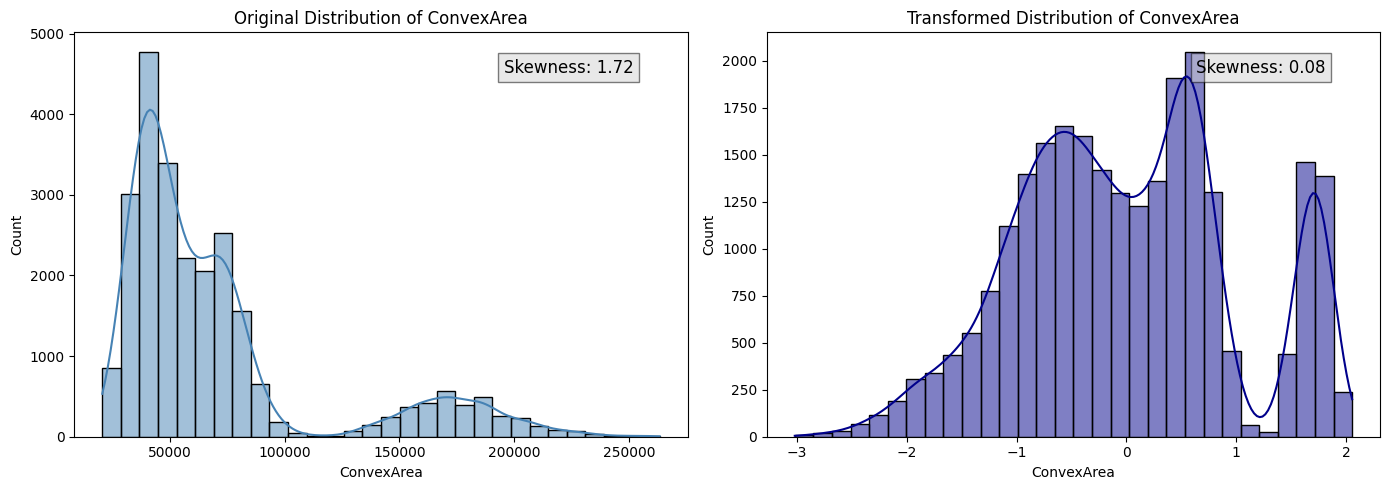

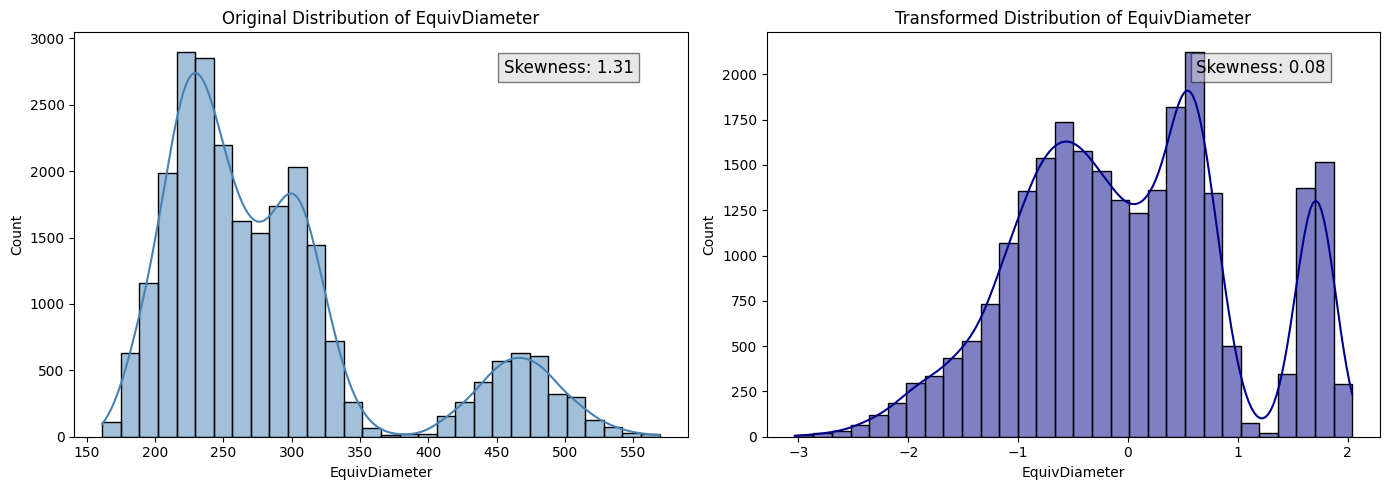

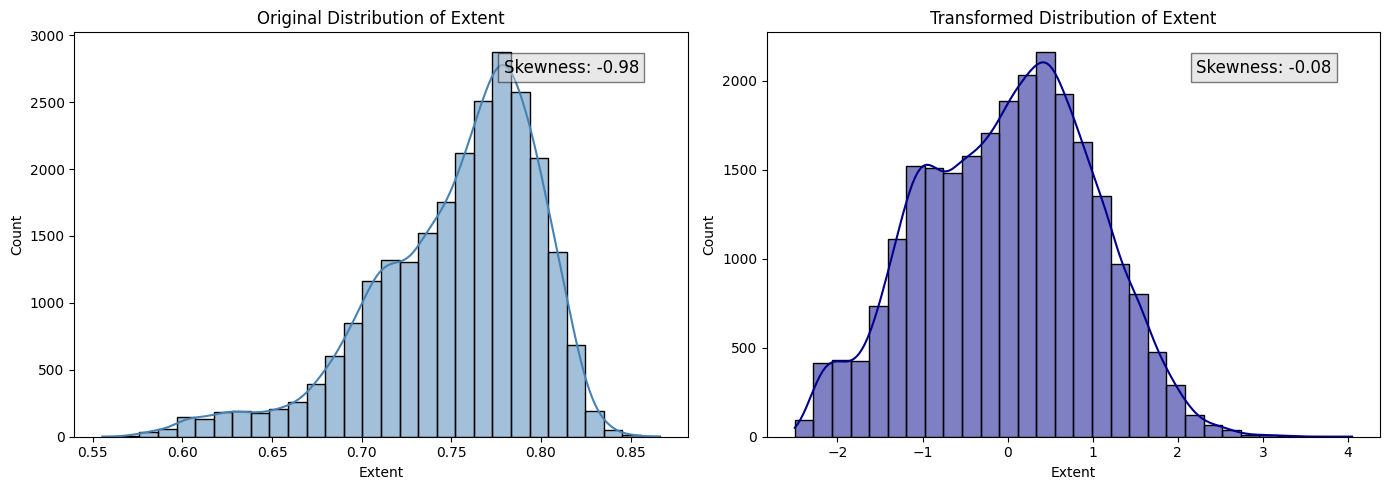

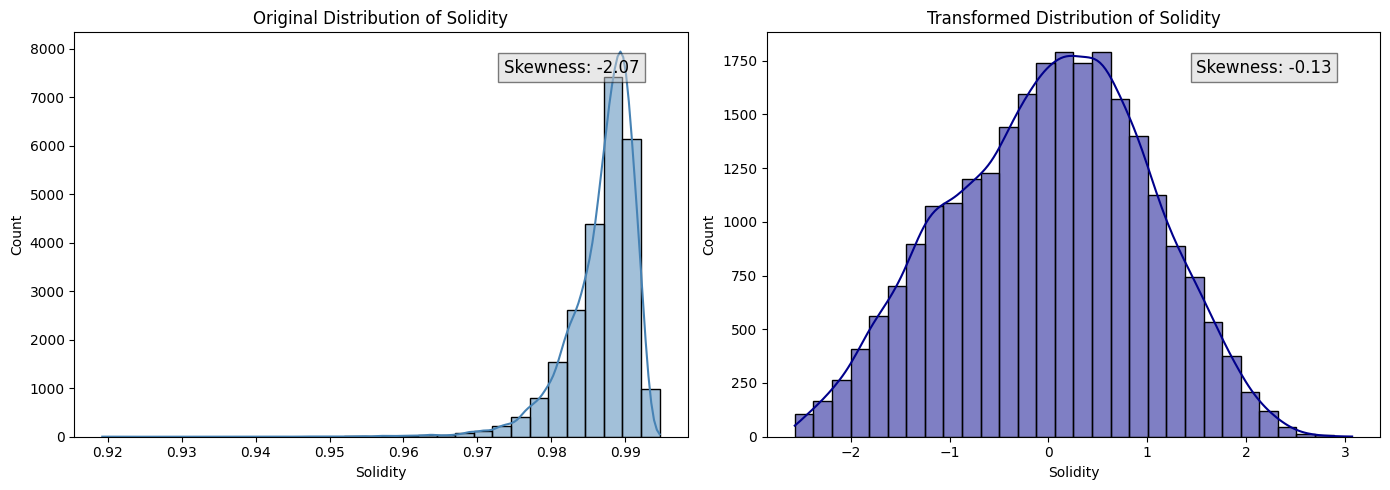

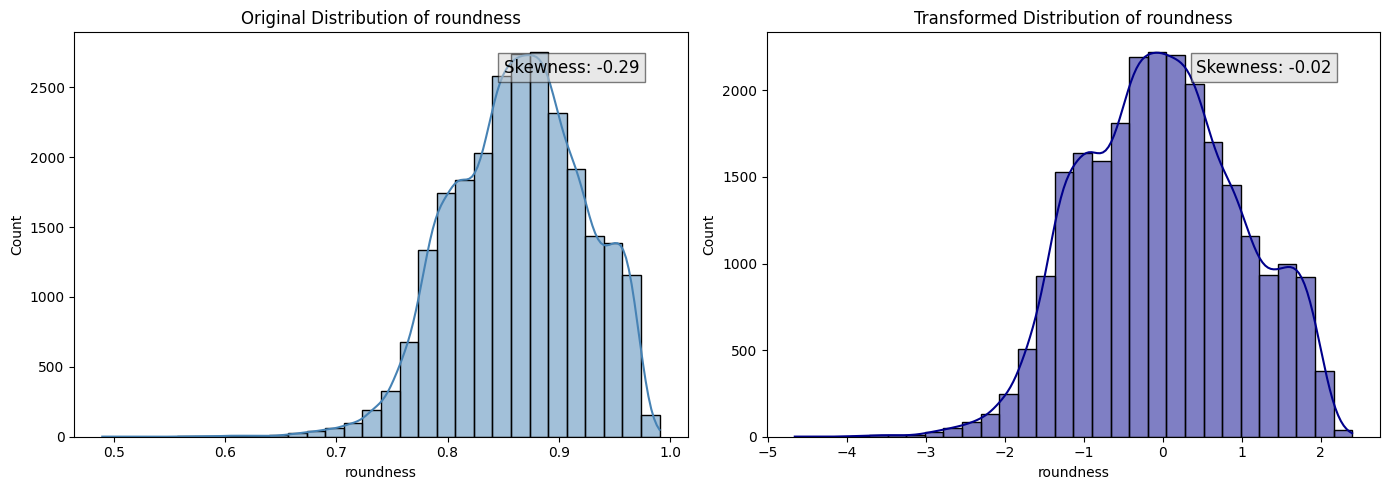

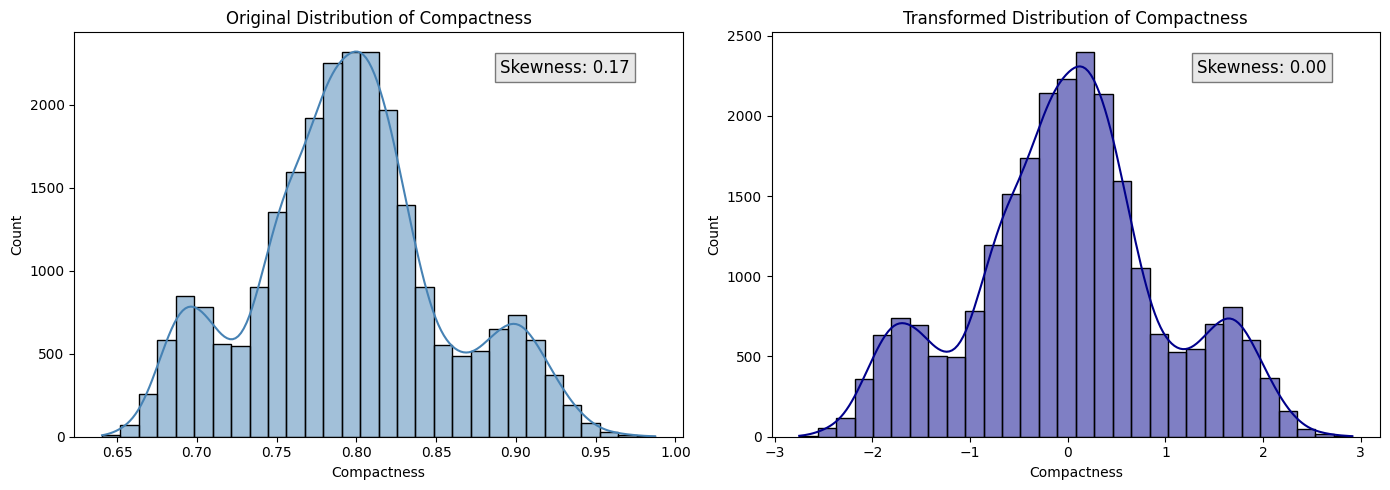

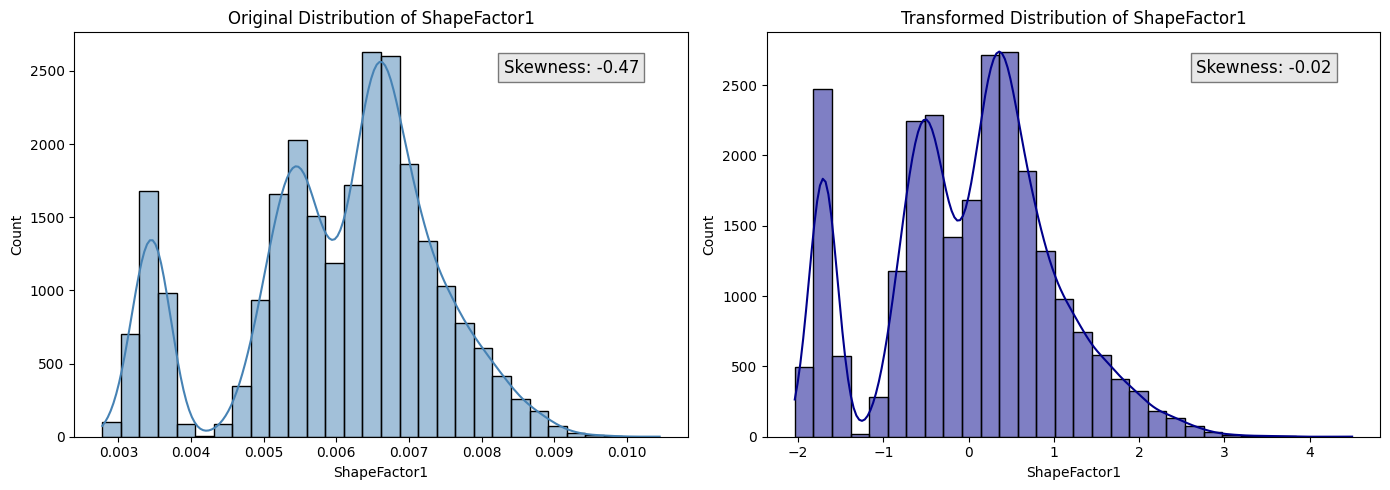

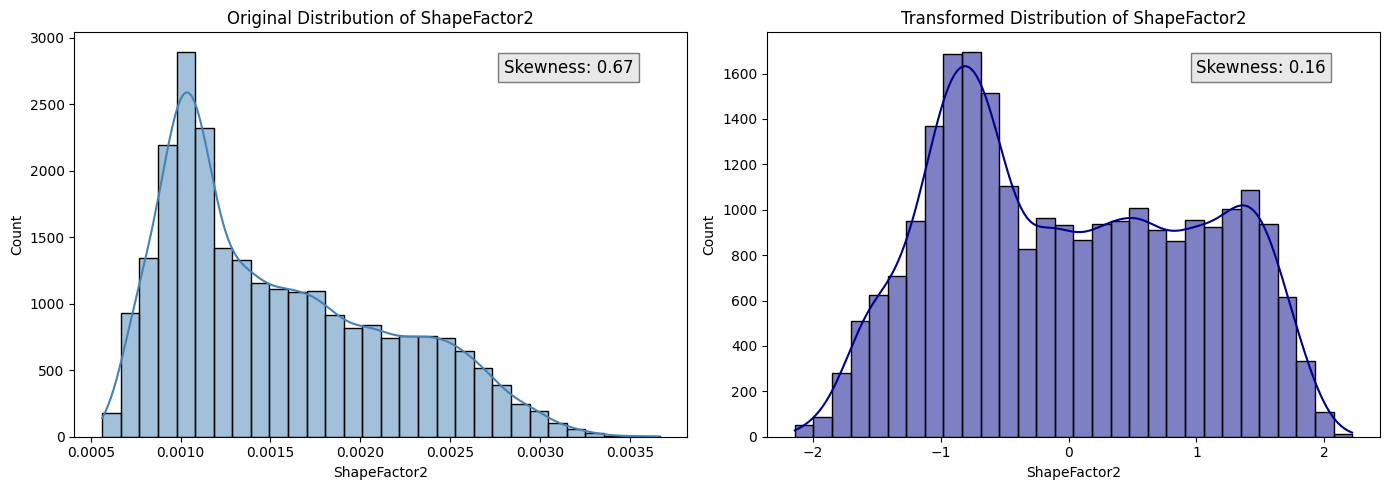

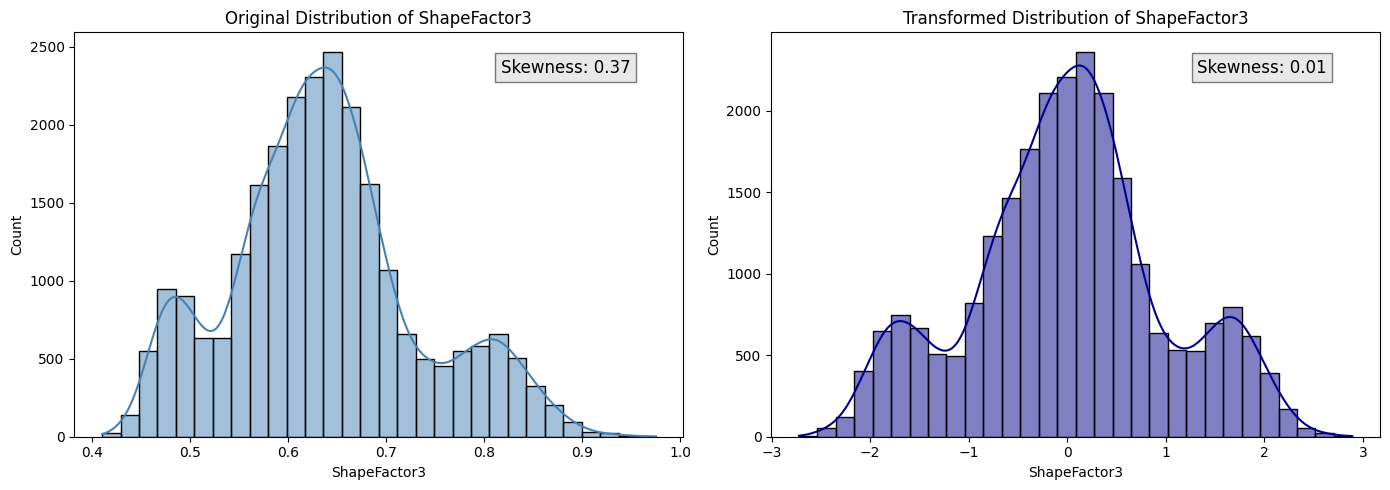

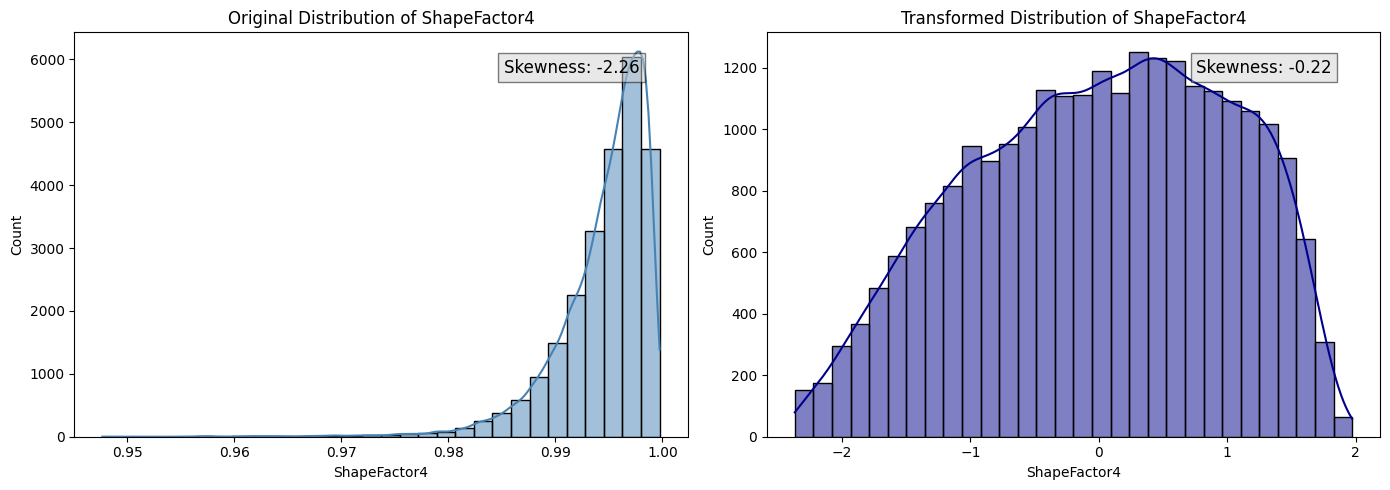

In [ ]:
from scipy.stats import skew

features_to_compare = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

for feature in features_to_compare:
  skew_before = skew(beans_oversampled[feature])
  skew_after = skew(beans_transformed[feature])

  # subplots
  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  # Original Data Distribution
  sns.histplot(beans_oversampled[feature], kde=True, bins=30, ax=axes[0], color='steelblue')
  axes[0].set_title(f'Original Distribution of {feature}')
  axes[0].set_xlabel(feature)
  axes[0].text(0.7, 0.9, f'Skewness: {skew_before:.2f}', transform=axes[0].transAxes, fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

  # Transformed Data Distribution
  sns.histplot(beans_transformed[feature], kde=True, bins=30, ax=axes[1], color='darkblue')
  axes[1].set_title(f'Transformed Distribution of {feature}')
  axes[1].set_xlabel(feature)
  axes[1].text(0.7, 0.9, f'Skewness: {skew_after:.2f}', transform=axes[1].transAxes, fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

  plt.tight_layout()
  plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc_scores_rf = []
all_y_true_rf = []
all_y_pred_rf = []
acc_scores_xgb = []
all_y_true_xgb = []
all_y_pred_xgb = []
acc_scores_cat = []
all_y_true_cat = []
all_y_pred_cat = []
acc_scores_log = []
all_y_true_log = []
all_y_pred_log = []

In [ ]:
X = beans_transformed.drop(columns = ['Class'])
y = beans_transformed['Class']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

for train_idx, test_idx in folds.split(X, y):
  X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  rf_model = RandomForestClassifier(random_state=42)
  rf_model.fit(X_train, y_train)

  # Predict
  y_pred_rf = rf_model.predict(X_test)

  # Accuracy for current fold
  acc_rf = accuracy_score(y_test, y_pred_rf)
  acc_scores_rf.append(acc_rf)

  # Collect predictions and actual labels
  all_y_true_rf.extend(y_test)
  all_y_pred_rf.extend(y_pred_rf)

In [ ]:
# Model Performance
avg_acc_rf = sum(acc_scores_rf) / len(acc_scores_rf)
print(f"\nAverage Accuracy (10-fold) - Random Forest: {avg_acc_rf:.4f}")
print("\nClassification Report:\n", classification_report(all_y_true_rf, all_y_pred_rf, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(all_y_true_rf, all_y_pred_rf))


Average Accuracy (10-fold) - Random Forest: 0.9531

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.97      0.96      0.97      3546
      BOMBAY       1.00      1.00      1.00      3546
        CALI       0.97      0.96      0.97      3546
    DERMASON       0.91      0.91      0.91      3546
       HOROZ       0.97      0.97      0.97      3546
       SEKER       0.96      0.97      0.97      3546
        SIRA       0.89      0.90      0.89      3546

    accuracy                           0.95     24822
   macro avg       0.95      0.95      0.95     24822
weighted avg       0.95      0.95      0.95     24822


Confusion Matrix:
 [[3416    1   66    1   11   19   32]
 [   2 3544    0    0    0    0    0]
 [  68    0 3420    0   40    8   10]
 [   0    0    0 3242    9   60  235]
 [   9    0   38   19 3423    0   57]
 [  10    0    0   46    0 3436   54]
 [  11    0    9  254   50   44 3178]]


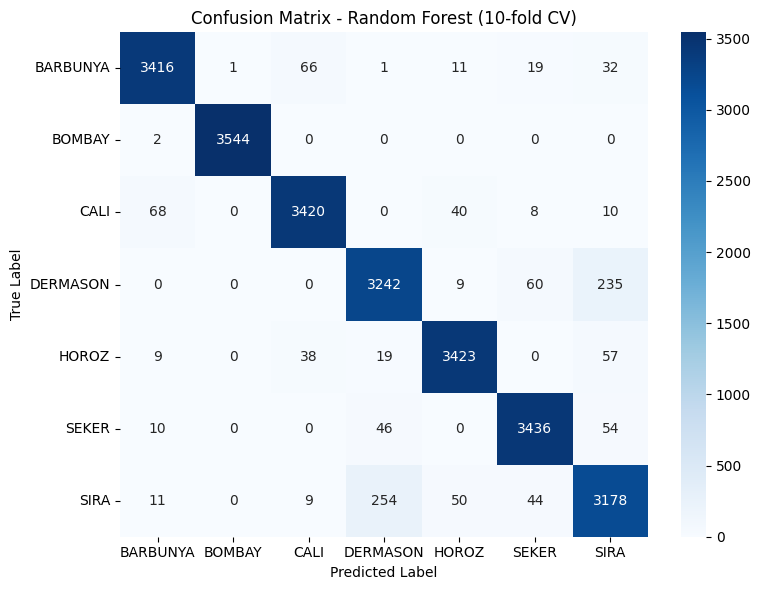

Class Mapping: {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [ ]:
# Get class names from label encoder
class_names = label_encoder.classes_

# Compute confusion matrix using all predictions from all folds
cm = confusion_matrix(all_y_true_rf, all_y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (10-fold CV)')
plt.tight_layout()
plt.show()

# class mapping for reference
class_mapping = dict(enumerate(class_names))
print("Class Mapping:", class_mapping)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
for train_idx, test_idx in folds.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train XGBoost model
    xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb_model.fit(X_train, y_train)

    # Predict
    y_pred_xgb = xgb_model.predict(X_test)

    # Accuracy and predictions
    acc_scores_xgb.append(accuracy_score(y_test, y_pred_xgb))
    all_y_true_xgb.extend(y_test)
    all_y_pred_xgb.extend(y_pred_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:55:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:55:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:55:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:55:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:55:44] WARNING: /w

In [ ]:
avg_acc_xgb = sum(acc_scores_xgb) / len(acc_scores_xgb)
print(f"\nAverage Accuracy (10-fold) - XGBoost: {avg_acc_xgb:.4f}")
print("\nClassification Report:\n", classification_report(all_y_true_xgb, all_y_pred_xgb, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(all_y_true_xgb, all_y_pred_xgb))


Average Accuracy (10-fold) - XGBoost: 0.9560

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.98      0.97      0.98      3546
      BOMBAY       1.00      1.00      1.00      3546
        CALI       0.97      0.98      0.97      3546
    DERMASON       0.91      0.91      0.91      3546
       HOROZ       0.98      0.97      0.97      3546
       SEKER       0.97      0.97      0.97      3546
        SIRA       0.89      0.90      0.89      3546

    accuracy                           0.96     24822
   macro avg       0.96      0.96      0.96     24822
weighted avg       0.96      0.96      0.96     24822


Confusion Matrix:
 [[3440    0   58    2    5   14   27]
 [   0 3546    0    0    0    0    0]
 [  42    0 3459    0   29    5   11]
 [   1    0    0 3222    7   58  258]
 [   9    0   32   19 3429    0   57]
 [   7    0    1   41    0 3443   54]
 [  10    0    3  253   46   43 3191]]


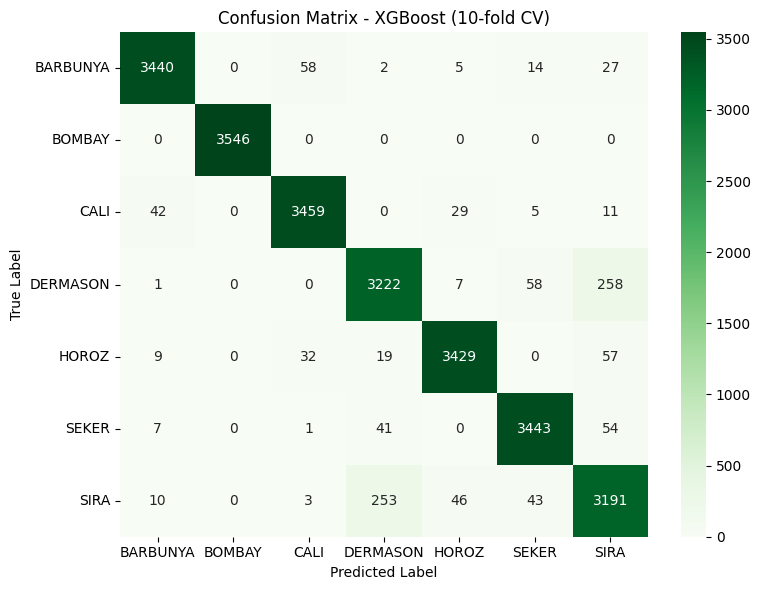

Class Mapping: {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [ ]:
# Confusion Matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(all_y_true_xgb, all_y_pred_xgb), annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost (10-fold CV)')
plt.tight_layout()
plt.show()

# Print class mapping
class_mapping = dict(enumerate(label_encoder.classes_))
print("Class Mapping:", class_mapping)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
for train_idx, test_idx in folds.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train CatBoost model
    catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6,
                                        loss_function='MultiClass', random_seed=42, verbose=False)
    catboost_model.fit(X_train, y_train)

    # Predict
    y_pred_cat = catboost_model.predict(X_test).flatten()  # flatten in case output is shape (n, 1)

    # Accuracy and predictions
    acc_scores_cat.append(accuracy_score(y_test, y_pred_cat))
    all_y_true_cat.extend(y_test)
    all_y_pred_cat.extend(y_pred_cat)

In [ ]:
# Model Performance - CatBoost
avg_acc_cat = sum(acc_scores_cat) / len(acc_scores_cat)
print(f"\nAverage Accuracy (10-fold) - CatBoost: {avg_acc_cat:.4f}")
print("\nClassification Report:\n", classification_report(all_y_true_cat, all_y_pred_cat, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(all_y_true_cat, all_y_pred_cat))



Average Accuracy (10-fold) - CatBoost: 0.9468

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.97      0.95      0.96      3546
      BOMBAY       1.00      1.00      1.00      3546
        CALI       0.95      0.96      0.96      3546
    DERMASON       0.90      0.91      0.91      3546
       HOROZ       0.96      0.96      0.96      3546
       SEKER       0.96      0.97      0.96      3546
        SIRA       0.88      0.88      0.88      3546

    accuracy                           0.95     24822
   macro avg       0.95      0.95      0.95     24822
weighted avg       0.95      0.95      0.95     24822


Confusion Matrix:
 [[3361    0  113    0   10   19   43]
 [   0 3546    0    0    0    0    0]
 [  69    5 3403    0   44    7   18]
 [   0    0    0 3224   10   66  246]
 [   8    0   50   20 3413    0   55]
 [  21    0    1   41    0 3422   61]
 [  17    0   10  288   62   37 3132]]


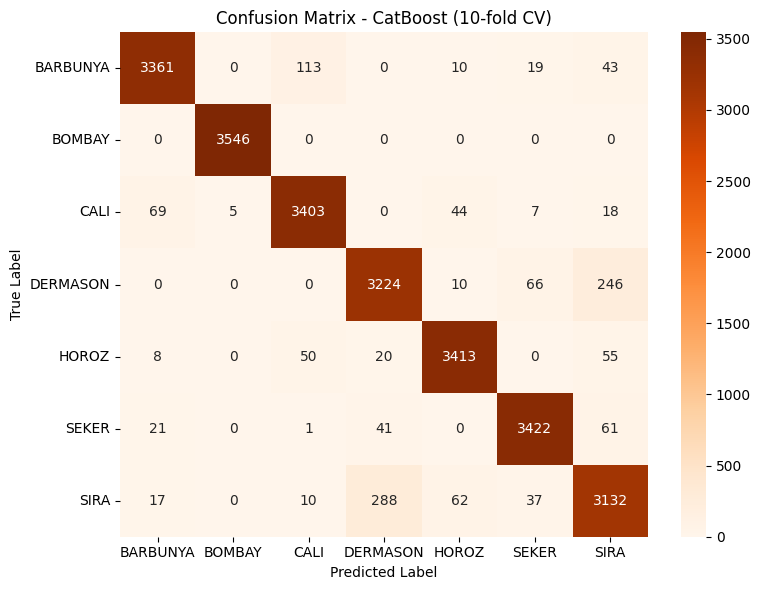

Class Mapping: {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [ ]:
# Confusion Matrix Plot - CatBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(all_y_true_cat, all_y_pred_cat), annot=True, fmt='d', cmap='Oranges',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CatBoost (10-fold CV)')
plt.tight_layout()
plt.show()

# Print class mapping
class_mapping = dict(enumerate(label_encoder.classes_))
print("Class Mapping:", class_mapping)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
for train_idx, test_idx in folds.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train Logistic Regression model
    log_model = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial', random_state=42)
    log_model.fit(X_train, y_train)

    # Predict
    y_pred_log = log_model.predict(X_test)

    # Accuracy and predictions
    acc_scores_log.append(accuracy_score(y_test, y_pred_log))
    all_y_true_log.extend(y_test)
    all_y_pred_log.extend(y_pred_log)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [ ]:
# Model Performance - Logistic Regression
avg_acc_log = sum(acc_scores_log) / len(acc_scores_log)
print(f"\nAverage Accuracy (10-fold) - Logistic Regression: {avg_acc_log:.4f}")
print("\nClassification Report:\n", classification_report(all_y_true_log, all_y_pred_log, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(all_y_true_log, all_y_pred_log))



Average Accuracy (10-fold) - Logistic Regression: 0.9441

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.96      0.95      0.95      3546
      BOMBAY       1.00      1.00      1.00      3546
        CALI       0.95      0.96      0.95      3546
    DERMASON       0.91      0.89      0.90      3546
       HOROZ       0.96      0.96      0.96      3546
       SEKER       0.96      0.97      0.96      3546
        SIRA       0.86      0.89      0.88      3546

    accuracy                           0.94     24822
   macro avg       0.94      0.94      0.94     24822
weighted avg       0.94      0.94      0.94     24822


Confusion Matrix:
 [[3353    0  115    0    5   18   55]
 [   0 3546    0    0    0    0    0]
 [  77    0 3400    0   43    9   17]
 [   1    0    0 3157    9   63  316]
 [   5    0   54   29 3410    0   48]
 [  32    0    1   32    0 3422   59]
 [   9    0   13  244   73   61 3146]]


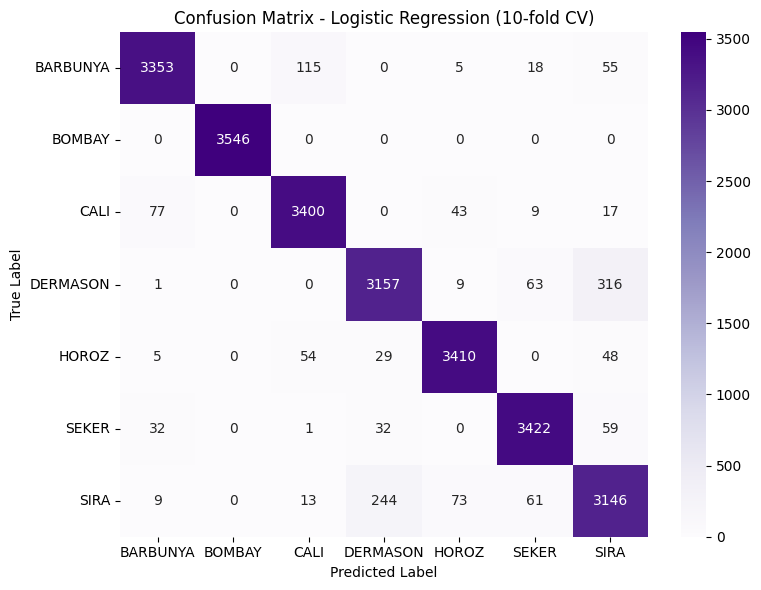

Class Mapping: {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [ ]:
# Confusion Matrix Plot - Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(all_y_true_log, all_y_pred_log), annot=True, fmt='d', cmap='Purples',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression (10-fold CV)')
plt.tight_layout()
plt.show()

# Print class mapping
class_mapping = dict(enumerate(label_encoder.classes_))
print("Class Mapping:", class_mapping)


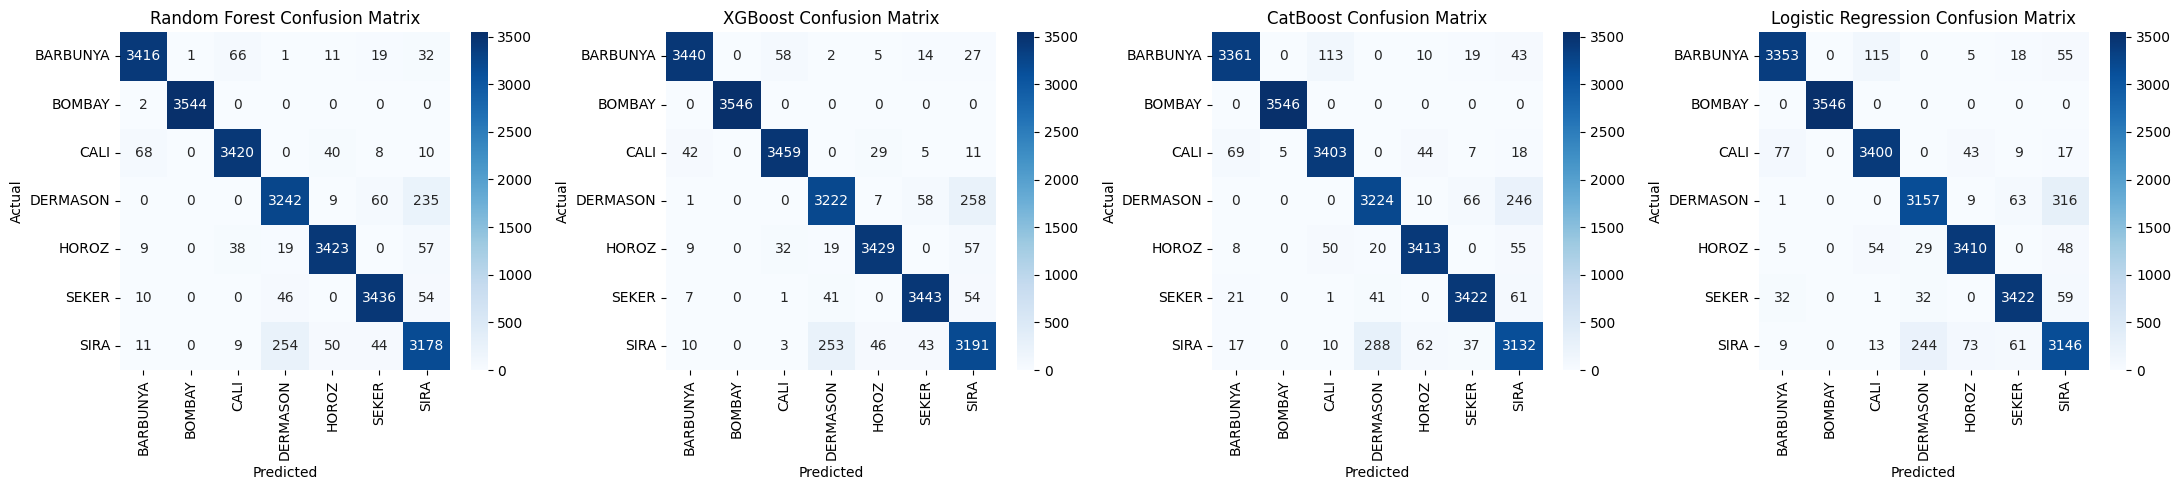

In [ ]:
# Compute confusion matrices using all folds
cm_rf   = confusion_matrix(all_y_true_rf, all_y_pred_rf)
cm_xgb  = confusion_matrix(all_y_true_xgb, all_y_pred_xgb)
cm_cat  = confusion_matrix(all_y_true_cat, all_y_pred_cat)
cm_log  = confusion_matrix(all_y_true_log, all_y_pred_log)

# Plot side-by-side
fig, axes = plt.subplots(1, 4, figsize=(22, 5))

titles = ["Random Forest", "XGBoost", "CatBoost", "Logistic Regression"]
cms = [cm_rf, cm_xgb, cm_cat, cm_log]

for i, ax in enumerate(axes):
    sns.heatmap(cms[i], annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_,
                ax=ax)
    ax.set_title(f'{titles[i]} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
print(f"Random Forest Accuracy: {avg_acc_rf * 100:.2f}%")
print(f"XGBoost Accuracy: {avg_acc_xgb * 100:.2f}%")
print(f"CatBoost Accuracy: {avg_acc_cat * 100:.2f}%")
print(f"Logistic Regression Accuracy: {avg_acc_log * 100:.2f}%")

Random Forest Accuracy: 95.31%
XGBoost Accuracy: 95.60%
CatBoost Accuracy: 94.68%
Logistic Regression Accuracy: 94.41%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

In [ ]:
# Binarize the true labels for multi-class ROC
y_true_bin = label_binarize(y, classes=range(len(label_encoder.classes_)))

# Store all evaluation results
models = {
    "Random Forest": (all_y_true_rf, all_y_pred_rf),
    "XGBoost":       (all_y_true_xgb, all_y_pred_xgb),
    "CatBoost":      (all_y_true_cat, all_y_pred_cat),
    "Logistic Reg":  (all_y_true_log, all_y_pred_log)
}

print("Model Evaluation (10-fold CV):\n")

for name, (y_true, y_pred) in models.items():
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"{name}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print()


Model Evaluation (10-fold CV):

Random Forest
  Accuracy:  0.9531
  Precision: 0.9533
  Recall:    0.9531
  F1 Score:  0.9532

XGBoost
  Accuracy:  0.9560
  Precision: 0.9562
  Recall:    0.9560
  F1 Score:  0.9561

CatBoost
  Accuracy:  0.9468
  Precision: 0.9469
  Recall:    0.9468
  F1 Score:  0.9468

Logistic Reg
  Accuracy:  0.9441
  Precision: 0.9443
  Recall:    0.9441
  F1 Score:  0.9441



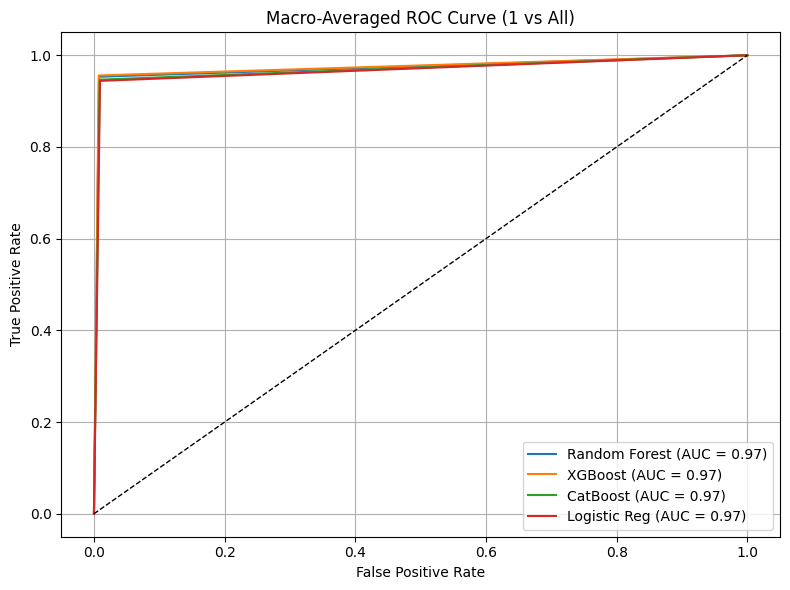

In [ ]:
# Plot macro-averaged ROC curves (1 vs all)
plt.figure(figsize=(8, 6))

for name, (y_true, y_pred) in models.items():
    y_true_bin = label_binarize(y_true, classes=range(len(label_encoder.classes_)))
    y_pred_bin = label_binarize(y_pred, classes=range(len(label_encoder.classes_)))

    try:
        auc_score = roc_auc_score(y_true_bin, y_pred_bin, average='macro', multi_class='ovr')
        fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    except ValueError:
        print(f"{name}: ROC/AUC not available due to insufficient class separation.")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-Averaged ROC Curve (1 vs All)")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Hence, we can conclude with an accuracy of 95.60% that XGBoost has the highest accuracy out of these models,

Thus, the advantages of using Machine Learning to classify the dry beans are:
- Higher, reproducible, and objective sample classification
- Excludes possibility of human inspectors misclassifying specimens
- Faster classification compared to human inspectors

Classification of these beans is critical for seed uniformity and quality assurance

Machine Learning implementation on this dataset gives us a better way of classifying the beans.

Further we observe that replacing sample undersampling with SMOTE(Synthetic Minority Oversampling Technique) gives us better values for accuracies of the models.

Here we have further used Yeo Johnson transformation instead of Boxcox transformation to compare the results

Further the 10 fold cross validation ensures that the result is reproducible and stays constant for any number of runtimes by separating the train test sets into 10 folds, and taking the average of the 10 folds to consider parameters such as accuracy.